# Clustering

**Cluster analysis** or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including *machine learning*, *pattern recognition*, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

> Following is the list **Clustering Algorithms** implemented
* Agglomerative Clustering
* Hierarchial Clustering
* Density Based Clustering
* K-Means Clustering 
* K-Mediods Clustering

## Preprocessing

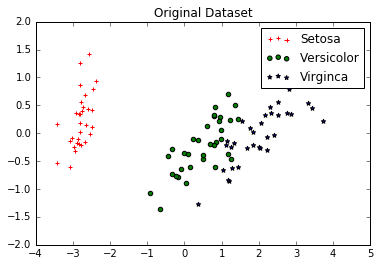

In [4]:
#import original dataset& visualing
from sklearn import datasets
import pandas as pd
orgdata=pd.read_csv('IRIS.csv')
data=orgdata.values[:,0:7]
target=pd.DataFrame(orgdata.values[:,8]).replace('setosa',0).replace('versicolor',1).replace('virginica',2).values
#visualizing results
import matplotlib.pyplot as pl
%matplotlib inline

#dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(data)
pca_2d=pca.transform(data)

#loading dataset
#iris=datasets.load_iris()

#visualising original dataset
for i in range(0,len(target)):
    if target[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if target[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if target[i]==2:
        c3=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Setosa','Versicolor','Virginca'])
pl.title('Original Dataset')
pl.show()

## Agglomerative Clustering

In [5]:
#import
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score


#model
agnes=AgglomerativeClustering(n_clusters=3)
res=agnes.fit_predict(data)
#print "Result : \n",res,'\n'

#checking score
print 'Score : ',accuracy_score(target,res)

Score :  0.242424242424


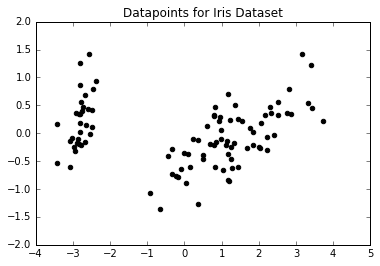

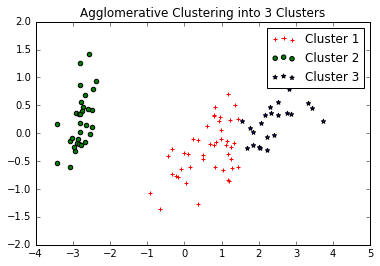

In [6]:
#visualizing whole dataset
pl.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
pl.title('Datapoints for Iris Dataset')
pl.show()

#visualizing clusters made by agglomerative algorithm
for i in range(0,len(res)):
    if res[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if res[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if res[i]==2:
        c3=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
pl.title('Agglomerative Clustering into 3 Clusters')
pl.show()

## Hierarchial Clustering


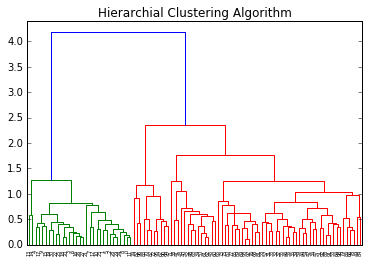

In [11]:
from scipy.cluster import hierarchy
res=hierarchy.linkage(data,'average')
pl.figure()
pl.title('Hierarchial Clustering Algorithm')
dn=hierarchy.dendrogram(res)

## Density Based Clustering:DBSCAN

0.242424242424


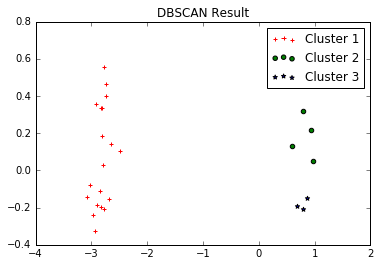

In [18]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.3,min_samples=3)
res=db.fit_predict(data)
print accuracy_score(target,res)
#visualization
#dbscan clusters
for i in range(0,pca_2d.shape[0]):
    if db.labels_[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if db.labels_[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if db.labels_[i]==2:
        c3=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
pl.title('DBSCAN Result')

## K-Mediod Clustering

Accuracy : 0.848484848485


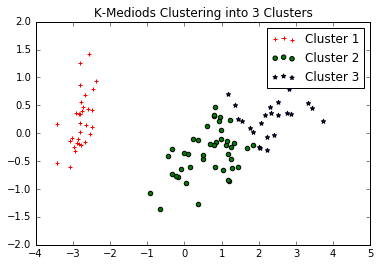

In [19]:
import pyclust

kmd=pyclust.KMedoids(n_clusters=3,n_trials=30)
kmd.fit(data)
kmdres=kmd.labels_
print 'Accuracy :',accuracy_score(kmdres,target)

#visualizing clusters made by agglomerative algorithm
for i in range(0,pca_2d.shape[0]):
    if kmdres[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if kmdres[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if kmdres[i]==2:
        c3=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
pl.title('K-Mediods Clustering into 3 Clusters')
pl.show()

## K-Means Clustering

Accuracy : 0.24


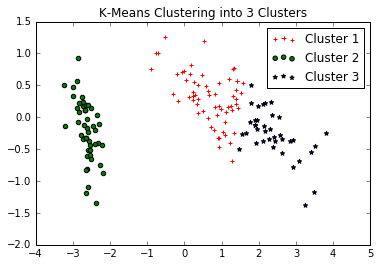

In [151]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(iris.data)
res= kmeans.labels_
print 'Accuracy :',accuracy_score(res,iris.target)

#Visualizing
for i in range(0,pca_2d.shape[0]):
    if res[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if res[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if res[i]==2:
        c3=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
pl.title('K-Means Clustering into 3 Clusters')
pl.show()

## Trying out Breast Cancer Clustering

/home/avhirup/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.652360515021


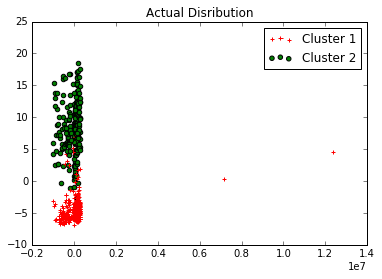

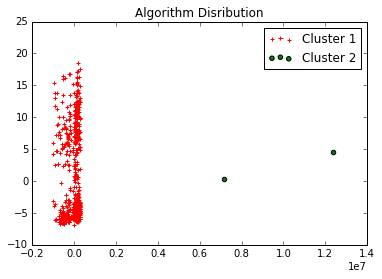

yes


In [162]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

dataframe=pd.read_csv('breast-cancer.data',header=None)
dataframe=dataframe.replace('?', '0')
data=dataframe.as_matrix()

#print data
target=data[:,10:]
data=data[:,0:9]

#clustering model
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(data)
#essential to convert class variable
le.fit(target)
target=le.transform(target)
#accuracy
print accuracy_score(target,kmeans.labels_)

from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(data[:,0:9])
pca_2d=pca.transform(data[:,0:9])


for i in range(0,len(target)):
    if target[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if target[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
pl.legend([c1,c2],['Cluster 1','Cluster 2'])
pl.title('Actual Disribution')
pl.show()

for i in range(0,len(kmeans.labels_)):
    if res[i]==0:
        c1=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if res[i]==1:
        c2=pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
pl.legend([c1,c2],['Cluster 1','Cluster 2'])
pl.title('Algorithm Disribution')
pl.show()

